# 2.  De partículas a una malla. Usa la rutina [scipy.interpolate.griddata](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html). Sugerencia revisa el ejemplo de las notas de clase y el de la página anterior.

In [5]:
# Aqui cargamos las liberias a usar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.special
import numpy as np
import math

## a) Crea una malla de 100x100, e interpola los datos del anillo y de los multiples anillos a esta malla. Grafíca los datos de la malla como gráfica de densidad y pon los puntos originales encimados. Llamaremos a esta malla y sus valores, el campo. Utiliza los tres métodos de interpolación: más cercano, lineal y cúbico 1D.

In [11]:
separacion = 5
longitud = 100

In [8]:
def construyecaja (l, s):
    nxlado = int(l / s)
    ntot = nxlado ** 2
    px = []
    py = []
    c = 1
    for i in range(1, nxlado):
        for j in range(1, nxlado):
            px.append(separacion * i)
            py.append(separacion * j)
            c += 1
    return px, py  

def construyeanillo(radio, radioint, n):
    xx2 = []
    yy2 = []
    u = 0
    while u < (n):
        fx = np.random.uniform(-radio, radio)
        fy = np.random.uniform(-radio, radio)
        rad = math.sqrt(math.pow(fx, 2) + math.pow(fy, 2))
        if rad <= radio:
            if rad >= radioint:
                xx2.append(fx)
                yy2.append(fy)
                u += 1
    return xx2, yy2

def construyearo(r, n):
    xx = []
    yy = []
    da = 360/n
    for i in range(0, n):
        fx = r * math.cos((i * da)*np.pi/180)
        fy = r * math.sin((i * da)*np.pi/180)
        xx.append(fx)
        yy.append(fy) 
    return xx, yy

def esparceanillos(nanillos, longcaja, radioaros, pxanillo):
    px, py = construyearo(radioaros, pxanillo)
    x = []
    y = []
    for i in range(0, nanillos):
        centrox = np.random.uniform(-longcaja/2, longcaja/2)
        centroy = np.random.uniform(-longcaja/2, longcaja/2)
        for j in range(0, pxanillo):
            mx = px[j] + centrox
            my = py[j] + centroy
            x.append(mx)
            y.append(my)
    return x, y

def construyeanillo(radio, radioint, n):
    xx2 = []
    yy2 = []
    u = 0
    while u < (n):
        fx = np.random.uniform(-radio, radio)
        fy = np.random.uniform(-radio, radio)
        rad = math.sqrt(math.pow(fx, 2) + math.pow(fy, 2))
        if rad <= radio:
            if rad >= radioint:
                xx2.append(fx)
                yy2.append(fy)
                u += 1
    return xx2, yy2



In [24]:
x, y = construyecaja (longitud, separacion)

nanillos = 15
pxanillo = len(x)
ranillos = 15
x9, y9 = esparceanillos(nanillos, longitud*2, ranillos, pxanillo)


radio = 100
radioint = 80
n = len(x)
xx2, yy2 = construyeanillo(radio, radioint, n)

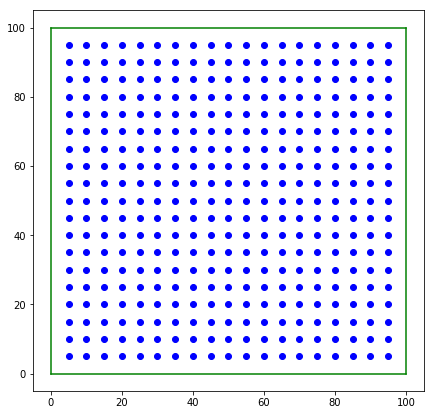

In [22]:
q1 = np.linspace(0, 0, 2)
q2 = np.linspace(0, longitud, 2)
q3 = np.linspace(longitud, longitud, 2)

plt.figure(figsize=(7, 7))
plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')

plt.plot(x,y, "bo")

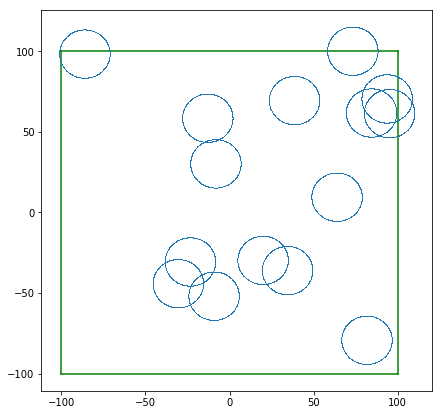

In [26]:
q1 = np.linspace(-longitud, -longitud, 2)
q2 = np.linspace(-longitud, longitud, 2)
q3 = np.linspace(longitud, longitud, 2)

plt.figure(figsize=(7, 7))

plt.plot(q1, q2, color = 'g')
plt.plot(q3, q2, color = 'g')
plt.plot(q2, q3, color = 'g')
plt.plot(q2, q1, color = 'g')
plt.plot(x9,y9, ",")


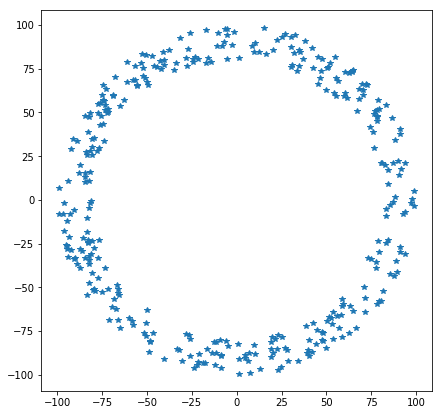

In [20]:
plt.figure(figsize=(7, 7))
plt.plot(xx2,yy2, "*")

## b) Calcula la función de correlación (estimador de Landy-Salay) para ambas muestras de datos usando los putos de la malla, y asignando un peso en cada punto dado por el valor del campo en ese punto. Grafica la función de correlación obtenida por este método de malla y compárala en la misma gráfica con la obtenida en base a los puntos originales. ¿Se parecen? ¿Dónde cambia? ¿Cómo cambia con los diferentes métodos de interpolación?

In [ ]:
def flasz(xm, ym, xr, yr, lcaja, nb):
    lmax = np.sqrt(2 * lcaja ** 2)  # Longitud maxima que puede haber en la caja
    nrd = len(xr)
    n = len(xm)
    dmalla = []
    drandom = []
    co = []
    
    dmalla = distancia(xm, ym) # Calculamos la distancia entre los puntos del arreglo en malla
    drandom = distancia(xr, yr) # Calculamos la distancia entre los puntos del arreglo de puntos aleatorios
    ddr = distanciadr(xm, ym, xr, yr) # Calculamos la distancia entre los puntos ordenados y los aleatorios
    
    dd, nbm = np.histogram(dmalla, bins = nb)
    rr, nbr = np.histogram(drandom, bins = nb)
    dr, nbrd = np.histogram(ddr, bins = nb)
    
    plt.figure()
    plt.figure(figsize=(15,5))
    plt.hist(dmalla, bins=nb, color = 'm' , alpha =0.5, label='$DD(r)$')
    plt.hist(drandom, bins=nb, color = 'g' , alpha =0.5, label='$RR(r)$')
    plt.hist(ddr, bins=nb, color = 'r' , alpha =0.5, label='$DDR(r)$')
    plt.legend()

    co = 1 + (dd / rr) * ((nrd / n) ** 2) - 2 * (dr / rr) * (nrd / n) # Calculamos la funcion de correlacion entre los histogramas

    x = np.linspace(0, lmax, len(co))

    plt.figure()
    plt.figure(figsize=(15,5))
    plt.plot(x, co, 'bo-', label='$Landy - Szalay$', color = 'k')
    #plt.xlim(0, 2100)
    
    return co

## c) Calcula la transformada de Fourier de este campo discreto (ie de la malla) para ambas muestras de datos, y obtén los espectros de potencia como el valor de expectación del producto de dos campos en este espacio de Fourier. Gráfica tanto el campo en el espacio de Fourier, como el espectro de potencias. ¿Cómo cambian los resultados del espectro de potencias con los diferentes métodos de interpolación?

Definimos la funcion para la tranformada de fourier

In [ ]:
def dft(x):
    N, yr, yi = len(x), [], []
    for k in range(N):
        real, imag = 0, 0
        for n in range(N):
            theta = -k * (2 * math.pi) * (float(n) / N)
            real += x[n] * math.cos(theta)
            imag += x[n] * math.sin(theta)
        yr.append(real / N) # Regresa la parte real
        yi.append(imag / N) # Regresa la parte imaginaria
    return yr, yi

## d) Utiliza la transformada de Fourier inversa para encontrar la función de correlación a partir de los espectros de potencia anteriores, y compáralos con los que encontraste en el inciso.

Definimos la funcion pra la tranformada inversa de Fourier

In [ ]:
def idft(yr, yi):
    N, x = len(yr), []
    for n in range(N):
        real, imag = 0, 0
        for k in range(N):
            theta = k * (2 * math.pi) * (float(n) / N)
            real += (yr[k] * math.cos(theta)) - (yi[k] * math.sin(theta))
            # imag += (yr[k] * math.sin(theta)) + (yi[k] * math.cos(theta))
        x.append(real)
    return x